In [15]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ", "MLPE"]
error = "MAE"
test_mus=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
dateexperiment = "2022_06_24_15_39"

errors = pd.DataFrame(index=test_mus,columns=quantificators,dtype=float)
for quant_name in quantificators:
    results = pd.read_csv("results/covariate/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results_mean = results.groupby(['test_mu'])['error'].mean()
    errors.loc[:,quant_name] = results_mean

print(errors)
print(errors.describe())

            CC       ACC       PCC      PACC       HDy       EMQ      MLPE
-1.5  0.005292  0.027720  0.005021  0.061603  0.021551  0.063562  0.394460
-1.0  0.006672  0.027482  0.006277  0.053616  0.021255  0.066754  0.331316
-0.5  0.008200  0.022687  0.007890  0.043828  0.021419  0.066010  0.272020
 0.0  0.008384  0.015903  0.008172  0.028244  0.017687  0.050028  0.184176
 0.5  0.009220  0.013365  0.008529  0.020662  0.017433  0.035349  0.099320
 1.0  0.008960  0.010090  0.008495  0.008054  0.013212  0.009679  0.027136
 1.5  0.009700  0.011226  0.009763  0.014655  0.013572  0.026911  0.109668
 2.0  0.007348  0.015461  0.006582  0.026786  0.023697  0.050844  0.182988
 2.5  0.007540  0.023078  0.006786  0.041321  0.020142  0.066704  0.268428
 3.0  0.006668  0.024993  0.005245  0.055078  0.024996  0.073013  0.339624
 3.5  0.005848  0.033153  0.005942  0.063267  0.021739  0.062099  0.387188
              CC        ACC        PCC       PACC        HDy        EMQ       MLPE
count  11.000000 

Text(0.5, 1.0, 'MAE under covariate shift')

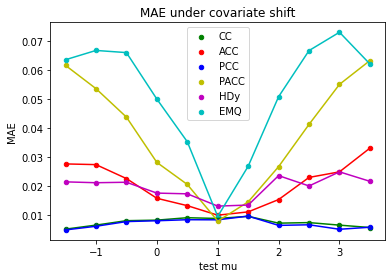

In [16]:
ax = None
markers = ['-*', '-x', '-o', '-D', '-s', '-^', '--^']
colours = ['g', 'r', 'b', 'y', 'm', 'c', 'k']
quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ"]
for i, quant_method in enumerate(quantificators):
    axes = errors.reset_index().plot(kind="scatter", x='index',y=quant_method, color=colours[i], label=quant_method,ax=ax)
    if ax == None:
        ax = axes 
    errors.reset_index().plot.line(x='index', y=quant_method, ax=ax, style=colours[i],legend=False)
ax.set_xlabel("test mu")
ax.set_ylabel(error)
ax.set_title("MAE under covariate shift")